<a href="https://colab.research.google.com/github/coder-j-0090/Self_Study/blob/main/Python_DataAnalysis_ML/6_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_KNN(Iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k = 갯수
NN = Nearest Neighbor(최근접)

kNN(분류기 = Classifier)

1111111 = 2
3333333 = 4
******* = ?

?는 무엇일까? 위에 두개를 scatter plot 에 그려서 matplotlib에 넣고(데이터 시각화) * 근처에 1이 많으면 *=2 일 확률이 높고 반대로 3이 많으면 *=4일 확률이 높아지다.

최근접 이웃들을 가지고 ? 를 찾을때 이웃들이 다 a 니까 ?도 a일것이다. k는 a(이웃)의 갯수다

Statistic 공부하자

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/iris.csv'
iris_data = pd.read_csv(data_path)

print(iris_data.head(10))

   caseno  SepalLength  SepalWidth  PetalLength  PetalWidth Species
0       1          5.1         3.5          1.4         0.2  setosa
1       2          4.9         3.0          1.4         0.2  setosa
2       3          4.7         3.2          1.3         0.2  setosa
3       4          4.6         3.1          1.5         0.2  setosa
4       5          5.0         3.6          1.4         0.2  setosa
5       6          5.4         3.9          1.7         0.4  setosa
6       7          4.6         3.4          1.4         0.3  setosa
7       8          5.0         3.4          1.5         0.2  setosa
8       9          4.4         2.9          1.4         0.2  setosa
9      10          4.9         3.1          1.5         0.1  setosa


이 밑부터 자르고 머 하는거 knn 전까지는 다 데이터전처리다

In [ ]:
#numpy 이용하여 print. numpy가 파이썬 리스트보다 빠르다
np_iris_data = np.array(iris_data)

#                 [세로 0부터 5미만, 가로줄 전부]
print(np_iris_data[0:5, :])
#표의 1,2,3차원 이랑 가로갯수 세로갯수 확인할 때 사용
print(np_iris_data.shape)

#Numpy 이용하여 slicing
#index와 label(결과치) 빼고 input variable 을 x_data에 저장
X_data = np_iris_data[:, 1:5]   #Index(세로)는 전부다. Columns(가로)줄은 1부터 4(5미만)까지. Caseno 랑 Species 제외
y_data = np_iris_data[:, -1]    #y 에는 역순으로 읽을때 -1을 사용

#data 분할

#0.3은 30%다. 70%는 트레이닝 set 으로 사용하고
#             30%는 70%의 트레이닝 set이 잘 됬는가 검증하는 과정이다.
#괄호 전까지는 정해진 코드다. 수정 불가. 괄호안의 데이터(x,y 데이터는 변수이름 따라 다르고 test_size 도 내가 정하는 비율에 따라 달라진다.)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3)

[[1 5.1 3.5 1.4 0.2 'setosa']
 [2 4.9 3.0 1.4 0.2 'setosa']
 [3 4.7 3.2 1.3 0.2 'setosa']
 [4 4.6 3.1 1.5 0.2 'setosa']
 [5 5.0 3.6 1.4 0.2 'setosa']]
(150, 6)


In [ ]:
#x값 데이터를 트레이닝할 때의 모양(가로 세로 갯수)을 출력
print(X_train.shape)

(105, 4)


# 정규화
MinMaxScaler()는 머신 러닝에서 데이터를 스케일링하기 위해 사용되는 방법 중 하나입니다. 주어진 데이터를 최소값과 최대값 사이의 범위로 변환하는데 사용됩니다. MinMaxScaler()를 사용할 때 scaler.fit()을 한 번만 사용하는 이유는 다음과 같습니다.


### Fit 메서드의 역할:
scaler.fit()은 주어진 데이터를 분석하여 스케일링을 위한 변환 기준을 결정하는 역할을 합니다. 주어진 데이터의 최소값과 최대값을 확인하고 스케일링에 필요한 파라미터를 설정합니다.


### 학습 데이터의 통일성:
머신 러닝에서는 학습 데이터와 테스트 데이터가 동일한 스케일링을 가져야 합니다. 따라서 학습 데이터에 대해서만 fit()을 호출하고, 테스트 데이터에 대해서는 동일한 scaler를 사용하여 변환(transform)을 수행해야 합니다. 이렇게 하면 학습 데이터와 테스트 데이터가 일관된 스케일링을 가지게 되어 모델의 성능을 더 정확하게 평가할 수 있습니다.


### 데이터 노출 방지:
학습 데이터에 대해서만 fit()을 수행하고 테스트 데이터에는 fit()을 수행하지 않는 이유는, 테스트 데이터에 대해 스케일링을 수행할 때마다 최소값과 최대값이 변하기 때문입니다. 이는 테스트 데이터가 학습 데이터와 다른 분포를 가질 수 있게 하고, 학습 데이터로부터 노출된 정보를 테스트 데이터로 누설하는 것을 방지합니다.



###따라서,
MinMaxScaler()에서 scaler.fit()은 주로 학습 데이터에 대해서만 호출하며, 테스트 데이터에 대해서는 동일한 scaler를 사용하여 transform()만 호출하여 스케일링을 적용합니다. 이를 통해 학습 데이터와 테스트 데이터가 일관된 스케일링을 가지게 하고, 모델의 성능을 정확하게 평가할 수 있도록 합니다.

In [ ]:
#정규화(normalization)      데이터의 단위가 다르면 컴퓨터가 헷갈릴 가능성이 있다.
#숫자는 달라도 비율은 비슷하겟지.
#그래서 x축 y축의 최댓값을 각각 1로 설정해놓고 숫자에 상관없이 비율로 인식시키면
#단위가 달라도 같은 비율로서 데이터로 인식

#직선거리로 갈때는(점 사이에 장애물 없을때는 유클리디안 디스턴스 사용, 만약에 장애물 같은게 있다면 맨해턴 텍시(수직으로 이동한다).)


#비율 조정하는걸 scaling 이라고 부른다. 그걸 하기위해서 함수 Scaler 생성
scaler = MinMaxScaler()     #자를 만들고(최솟값 최댓값 찾기)


#예를 들어서 최소값이 4고 최댓값이 6이면 4를 0으로 취급하고 6을 1로 취급
scaler.fit(X_train)         #[0,1] bound : X_trian 에서 min, max를 찾아서 scaler를 [0,1]로 바꿈



#scaler.fit(X_test) #X_train의 비율을 따라가기 위해 안해줌
#테스트로 scaler(자) 를 만들면 자가 두개가 되서 판단이 헷갈린다.


#scaler.fit에서 트레이닝 한것에 맞게 X_train 과 X_Test를 변환
X_train = scaler.transform(X_train)     #학습된 scaler로 데이터를 변환
X_test = scaler.transform(X_test)       #학습된 scaler로 데이터를 변환

In [ ]:
#0에서 1 사이의 숫자들로 바뀌어 있다.
print(X_train)

In [ ]:
#k-NN 학습 / 훈련
k = 5 #hyperparameter

#           KNN 분류기(생성자다). n_neighbors는 지정되어 있는 변수의 값이다(변경불가).
knn_model = KNeighborsClassifier(n_neighbors = k)       #생성자 안에다 n개의 근처값(n개의 이웃) 가까운 놈들의 갯수 지정
knn_model.fit(X_train, y_train)     #모델에 학습함 X_train, y_train으로

KNeighborsClassifier()

In [ ]:
#k-NN 평가 / X_test, y_test으로
#knn_pred_train = knn_model.predict(X_train) 이거는 안됨 /unseen data(훈련에 사용되지 않은 데이터)를 사용해야됨
#unseen data를 사용해야 하는 이유는 트레이닝 한 데이터로 predict 를 하게되면 과적합(overfit)이 되서 올바른 predict를 할 수 없다.


knn_pred = knn_model.predict(X_test)
#metrics.accuracy_score가 예측결과의 정확도를 알려주는 함수다. accuracy_score는 metrics에 들어있다.
#얼마나 정확한지 그것까지 평가하는 함수를 넣어놓는것이 score이다.
print('knn accuracy:{:.3f}'.format(metrics.accuracy_score(y_test, knn_pred)))

#사진참조

knn accuracy:0.956


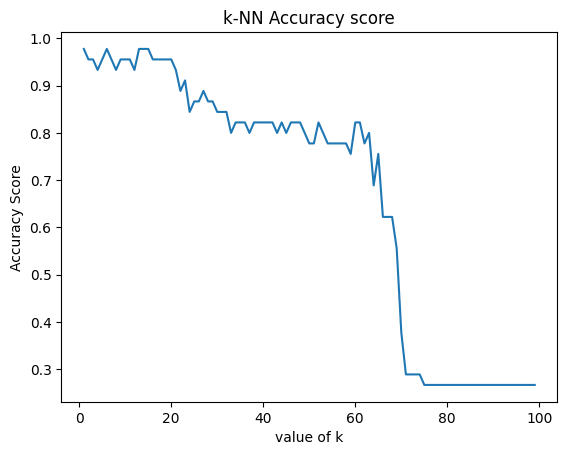

In [ ]:
#데이터들을 컴퓨터 내에서 이것저것 섞으면서 같은 데이터 같은 코드를 써도 결과가 다를 수 있다(차이가 거의 없다).

#최적의 k값 시각화
k_range = range(1,100)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.plot(k_range, scores)
plt.xlabel("value of k")
plt.ylabel("Accuracy Score")
plt.title("k-NN Accuracy score")
plt.show()